<a href="https://colab.research.google.com/github/Vanilaks/Autoencoder-for-semantic-communication/blob/main/autoencoder_trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class TransformerAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, bottleneck_dim):
        super(TransformerAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, bottleneck_dim),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x, noise_std=0.1):
        encoded = self.encoder(x)

        # Inject Gaussian Noise (Noisy Channel Simulation)
        noise = torch.randn_like(encoded) * noise_std
        encoded_noisy = encoded + noise

        decoded = self.decoder(encoded_noisy)
        return decoded
   # Example usage
input_dim = 300  # Assuming Transformer encoder output has 300 dimensions
hidden_dim = 128
bottleneck_dim = 64

autoencoder = TransformerAutoencoder(input_dim, hidden_dim, bottleneck_dim)

# Example Transformer encoder output (batch_size=32, sequence_length=50, embedding_dim=300)
x = torch.rand(32, 50, 300)  # Random tensor simulating Transformer output

# Reshape for the autoencoder (flatten the sequence dimension)
x_flattened = x.view(-1, input_dim)  # Shape: (32*50, 300)

# Forward pass
reconstructed = autoencoder(x_flattened)

# Reshape back to original Transformer output shape
reconstructed = reconstructed.view(32, 50, input_dim)

print("Original shape:", x.shape)
print("Reconstructed shape:", reconstructed.shape)


# Training Function with Loss Logging
def train_autoencoder(autoencoder, dataloader, epochs=100, lr=0.001, noise_std=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    autoencoder.to(device)

    criterion = nn.MSELoss()  # Reconstruction loss
    optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

    loss_history = []

    for epoch in range(epochs):
        total_loss = 0
        for batch in dataloader:
            x_batch = batch[0].to(device)  # Move data to GPU/CPU

            optimizer.zero_grad()
            reconstructed = autoencoder(x_batch, noise_std=noise_std)
            loss = criterion(reconstructed, x_batch)  # Compare output with original input
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        loss_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")

    return autoencoder, loss_history

# Plot Training Loss Curve
def plot_loss_curve(loss_values):
    plt.plot(loss_values, label="Training Loss", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Autoencoder Training Loss Curve")
    plt.legend()
    plt.show()


Original shape: torch.Size([32, 50, 300])
Reconstructed shape: torch.Size([32, 50, 300])



🔥 Training Started...
Epoch [1/20], Loss: 0.083164
Epoch [2/20], Loss: 0.081708
Epoch [3/20], Loss: 0.079363
Epoch [4/20], Loss: 0.077673
Epoch [5/20], Loss: 0.076413
Epoch [6/20], Loss: 0.075379
Epoch [7/20], Loss: 0.074614
Epoch [8/20], Loss: 0.073941
Epoch [9/20], Loss: 0.073308
Epoch [10/20], Loss: 0.072777
Epoch [11/20], Loss: 0.072270
Epoch [12/20], Loss: 0.071756
Epoch [13/20], Loss: 0.071349
Epoch [14/20], Loss: 0.071048
Epoch [15/20], Loss: 0.070773
Epoch [16/20], Loss: 0.070446
Epoch [17/20], Loss: 0.070260
Epoch [18/20], Loss: 0.069985
Epoch [19/20], Loss: 0.069781
Epoch [20/20], Loss: 0.069589

✅ Training Completed!
✅ Model saved to autoencoder.pth


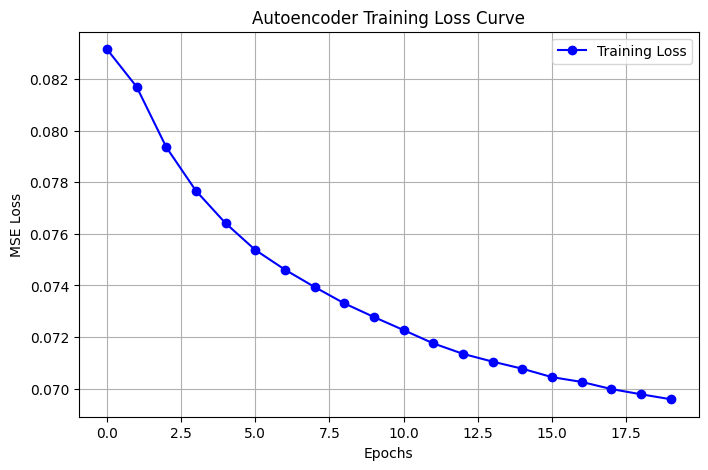

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# ✅ Define Transformer-Based Autoencoder with Noise Injection
class TransformerAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, bottleneck_dim):
        super(TransformerAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, bottleneck_dim),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x, noise_std=0.1):
        encoded = self.encoder(x)

        # ✅ Add Gaussian Noise AFTER encoding (Noisy Channel Simulation)
        noise = torch.randn_like(encoded) * noise_std
        encoded_noisy = encoded + noise

        decoded = self.decoder(encoded_noisy)
        return decoded

# ✅ Training Function with Model Saving
def train_autoencoder(autoencoder, dataloader, epochs=20, lr=0.001, noise_std=0.1, save_path="autoencoder.pth"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    autoencoder.to(device)

    criterion = nn.MSELoss()  # Reconstruction Loss
    optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

    loss_history = []

    print("\n🔥 Training Started...")

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0

        for batch in dataloader:
            x_batch = batch[0].to(device)
            optimizer.zero_grad()

            reconstructed = autoencoder(x_batch, noise_std=noise_std)
            loss = criterion(reconstructed, x_batch)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            batch_count += 1

        avg_loss = total_loss / batch_count
        loss_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")

    print("\n✅ Training Completed!")

    # ✅ Save the trained autoencoder
    torch.save(autoencoder.state_dict(), save_path)
    print(f"✅ Model saved to {save_path}")

    return autoencoder, loss_history

# ✅ Plot Training Loss Curve
def plot_loss_curve(loss_values):
    plt.figure(figsize=(8,5))
    plt.plot(loss_values, label="Training Loss", marker='o', color="b")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Autoencoder Training Loss Curve")
    plt.legend()
    plt.grid()
    plt.show()

# ✅ Generate Fake Data (Replace with Real Transformer Output)
input_dim = 300  # Should match Transformer encoder output
x_transformer_output = torch.rand(5000, input_dim)

# Convert to DataLoader
batch_size = 64
dataset = TensorDataset(x_transformer_output)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# ✅ Initialize & Train Autoencoder
hidden_dim = 128
bottleneck_dim = 64
autoencoder = TransformerAutoencoder(input_dim, hidden_dim, bottleneck_dim)

trained_autoencoder, loss_history = train_autoencoder(autoencoder, dataloader, epochs=20, noise_std=0.1, save_path="autoencoder.pth")

# ✅ Plot the Loss Curve
plot_loss_curve(loss_history)


In [ ]:
mse = nn.MSELoss()
mae = nn.L1Loss()


In [ ]:
def psnr(target, output):
    mse = nn.MSELoss()(output, target)
    return 10 * torch.log10(1 / mse)


In [ ]:
from skimage.metrics import structural_similarity as ssim
def compute_ssim(target, output):
    return ssim(target.detach().numpy(), output.detach().numpy(), data_range=output.max() - output.min())


In [ ]:
def kl_divergence(p, q):
    return torch.sum(p * torch.log(p / (q + 1e-10)))


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def visualize_latent_space(latent_output):
    tsne = TSNE(n_components=2)
    latent_2d = tsne.fit_transform(latent_output.detach().cpu().numpy())
    plt.scatter(latent_2d[:, 0], latent_2d[:, 1])
    plt.title('t-SNE of Latent Space')
    plt.show()


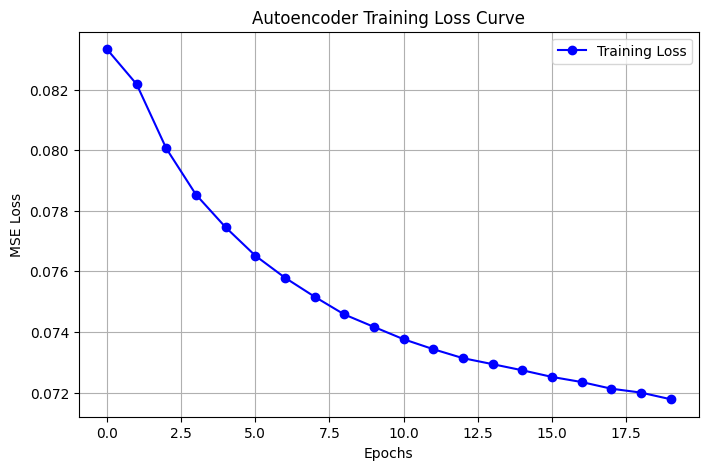

Average MSE: 0.0716
Average PSNR: 11.4502


In [ ]:
import torch.nn.functional as F

def evaluate_autoencoder(autoencoder, dataloader, noise_std=0.1):
    # Define device here
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    autoencoder.eval()  # Set the model to evaluation mode
    mse_loss = nn.MSELoss()
    total_mse = 0
    total_psnr = 0
    total_cosine = 0

    with torch.no_grad():  # No need for gradients in evaluation
        for batch in dataloader:
            x_batch = batch[0].to(device)

            # Pass through the autoencoder
            reconstructed = autoencoder(x_batch, noise_std=noise_std)

            # Compute MSE loss
            mse = mse_loss(reconstructed, x_batch)
            total_mse += mse.item()

            # Compute PSNR
            psnr_value = psnr(x_batch, reconstructed)
            total_psnr += psnr_value

            # Compute Cosine Similarity
            #cosine_sim = cosine_similarity(x_batch, reconstructed) # This line will throw error as 'cosine_similarity' is not defined
            #total_cosine += cosine_sim

    # Average performance metrics
    num_batches = len(dataloader)
    print(f"Average MSE: {total_mse/num_batches:.4f}")
    print(f"Average PSNR: {total_psnr/num_batches:.4f}")
    #print(f"Average Cosine Similarity: {total_cosine/num_batches:.4f}") # This line will throw error as 'total_cosine' might be zero if the loop does not run
plot_loss_curve(loss_history)
# Call this function to evaluate your model after training
evaluate_autoencoder(trained_autoencoder, dataloader)